# Import Packages

In [20]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib as mpl
from matplotlib import pyplot as plt

import seaborn as sns

# Load and Engineer Data

In [21]:
# CSV's were downloaded from Kaggle
df_train = pd.read_csv('./train.csv')


categorical_cols = df_train.select_dtypes(exclude = ['float64', 'int64'])
numeric_cols = df_train.select_dtypes( ['float64', 'int64'])

In [22]:
#Here filling NaN numeric values with 0
df_train[numeric_cols.columns] = df_train[numeric_cols.columns].fillna(0)

# Standarizing the numeric inputs for coefficient comparison
# columns_to_standardize = numeric_cols.columns[1:-1]
# scaler = StandardScaler()
# df_train[columns_to_standardize] = scaler.fit_transform(df_train[columns_to_standardize])




In [23]:
# One Hot Encoding the categorical values
one_hot_encoder = OneHotEncoder()
df_one_hot_train = df_train

for col in categorical_cols:
  df2 = pd.DataFrame(one_hot_encoder.fit_transform(df_one_hot_train[[col]]).toarray())
  df2.columns = one_hot_encoder.get_feature_names_out()
  df_one_hot_train = df_one_hot_train.join(df2)

df_one_hot_train = df_one_hot_train.drop(categorical_cols,axis=1)

In [24]:
#Moving SalePrice (y) to be last column
df_one_hot_train=df_one_hot_train[[c for c in df_one_hot_train if c != "SalePrice"] + ["SalePrice"]]

df_standardized = df_one_hot_train.apply(lambda x: (x - x.min())/(x.max() - x.min()))

df_one_hot_train.tail()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,142125
1459,1460,20,75.0,9937,5,6,1965,1965,0.0,830,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,147500


# Fit a Linear Regression Model

In [25]:
X = df_standardized.values[:, 1:-1]
y = df_standardized.values[:, -1]

reg = LinearRegression().fit(X, y)

final_cols = df_one_hot_train.columns
coefficients = reg.coef_

coefficient_col = []

for i,col in enumerate(final_cols[1:-1]):
      coefficient_col.append([col,coefficients[i]])

sorts = sorted(coefficient_col, key = lambda x:abs(x[1]))

# Printing the columns with their corresponding coefficients, sorted by absolute
# value of the coefficient
for col in sorts:
  print(col)



['OpenPorchSF', 0.0007098927124527901]
['BsmtHalfBath', -0.0012747663555589261]
['EnclosedPorch', 0.0025185384611121995]
['LotFrontage', 0.0028230068359391854]
['YrSold', -0.0030316635966300964]
['HalfBath', 0.0052002436925254435]
['MiscVal', 0.005508061498403549]
['BsmtFullBath', 0.006552452236651893]
['MoSold', -0.007071949541568756]
['YearRemodAdd', 0.008623029783896792]
['MSSubClass', -0.013209232521079509]
['FullBath', 0.01509772147000724]
['WoodDeckSF', 0.017757424861819693]
['GarageCars', 0.022339754708870473]
['ScreenPorch', 0.023561873284142585]
['3SsnPorch', 0.024016995555403833]
['Fireplaces', 0.025977821731130647]
['TotRmsAbvGrd', 0.029783667154284887]
['GarageArea', 0.036700661716040583]
['BedroomAbvGr', -0.0398522775111798]
['MasVnrArea', 0.046056836608067406]
['KitchenAbvGr', -0.056190568386904415]
['YearBuilt', 0.06108982888641752]
['OverallCond', 0.06412635706030913]
['GarageYrBlt', -0.06796035874034842]
['OverallQual', 0.08518813431055221]
['LotArea', 0.21360023723983

In [26]:
from sklearn.model_selection import train_test_split

# We selected the columns that were both significant and within land developers control/something they would know
# We assumed that quality was highly related to deterioration and not in developers control
cols_to_keep = ['GrLivArea', '2ndFlrSF','1stFlrSF','BsmtExposure_Gd','BsmtExposure_Av','BsmtExposure_Mn','BsmtExposure_No','BsmtExposure_nan',
                'Foundation_Wood','Foundation_Slab','Foundation_BrkTil','Foundation_CBlock','Foundation_PConc','Foundation_Stone','BldgType_Twnhs',
                'BldgType_TwnhsE','BldgType_Duplex','BldgType_2fmCon','BldgType_1Fam', 'GarageType_nan','GarageType_CarPort','GarageType_Basment',
                'GarageType_Detchd','GarageType_Attchd','GarageType_BuiltIn','GarageType_2Types','LotShape_IR3','LotShape_IR2','LotShape_Reg',
                'LotShape_IR1','Fence_GdPrv','Fence_MnWw','Fence_GdWo','Fence_nan','Fence_MnPrv','RoofStyle_Flat','RoofStyle_Hip','RoofStyle_Gable',
                'RoofStyle_Gambrel','RoofStyle_Mansard','RoofStyle_Shed', 'SalePrice']


final_df = df_one_hot_train[cols_to_keep]


<Axes: >

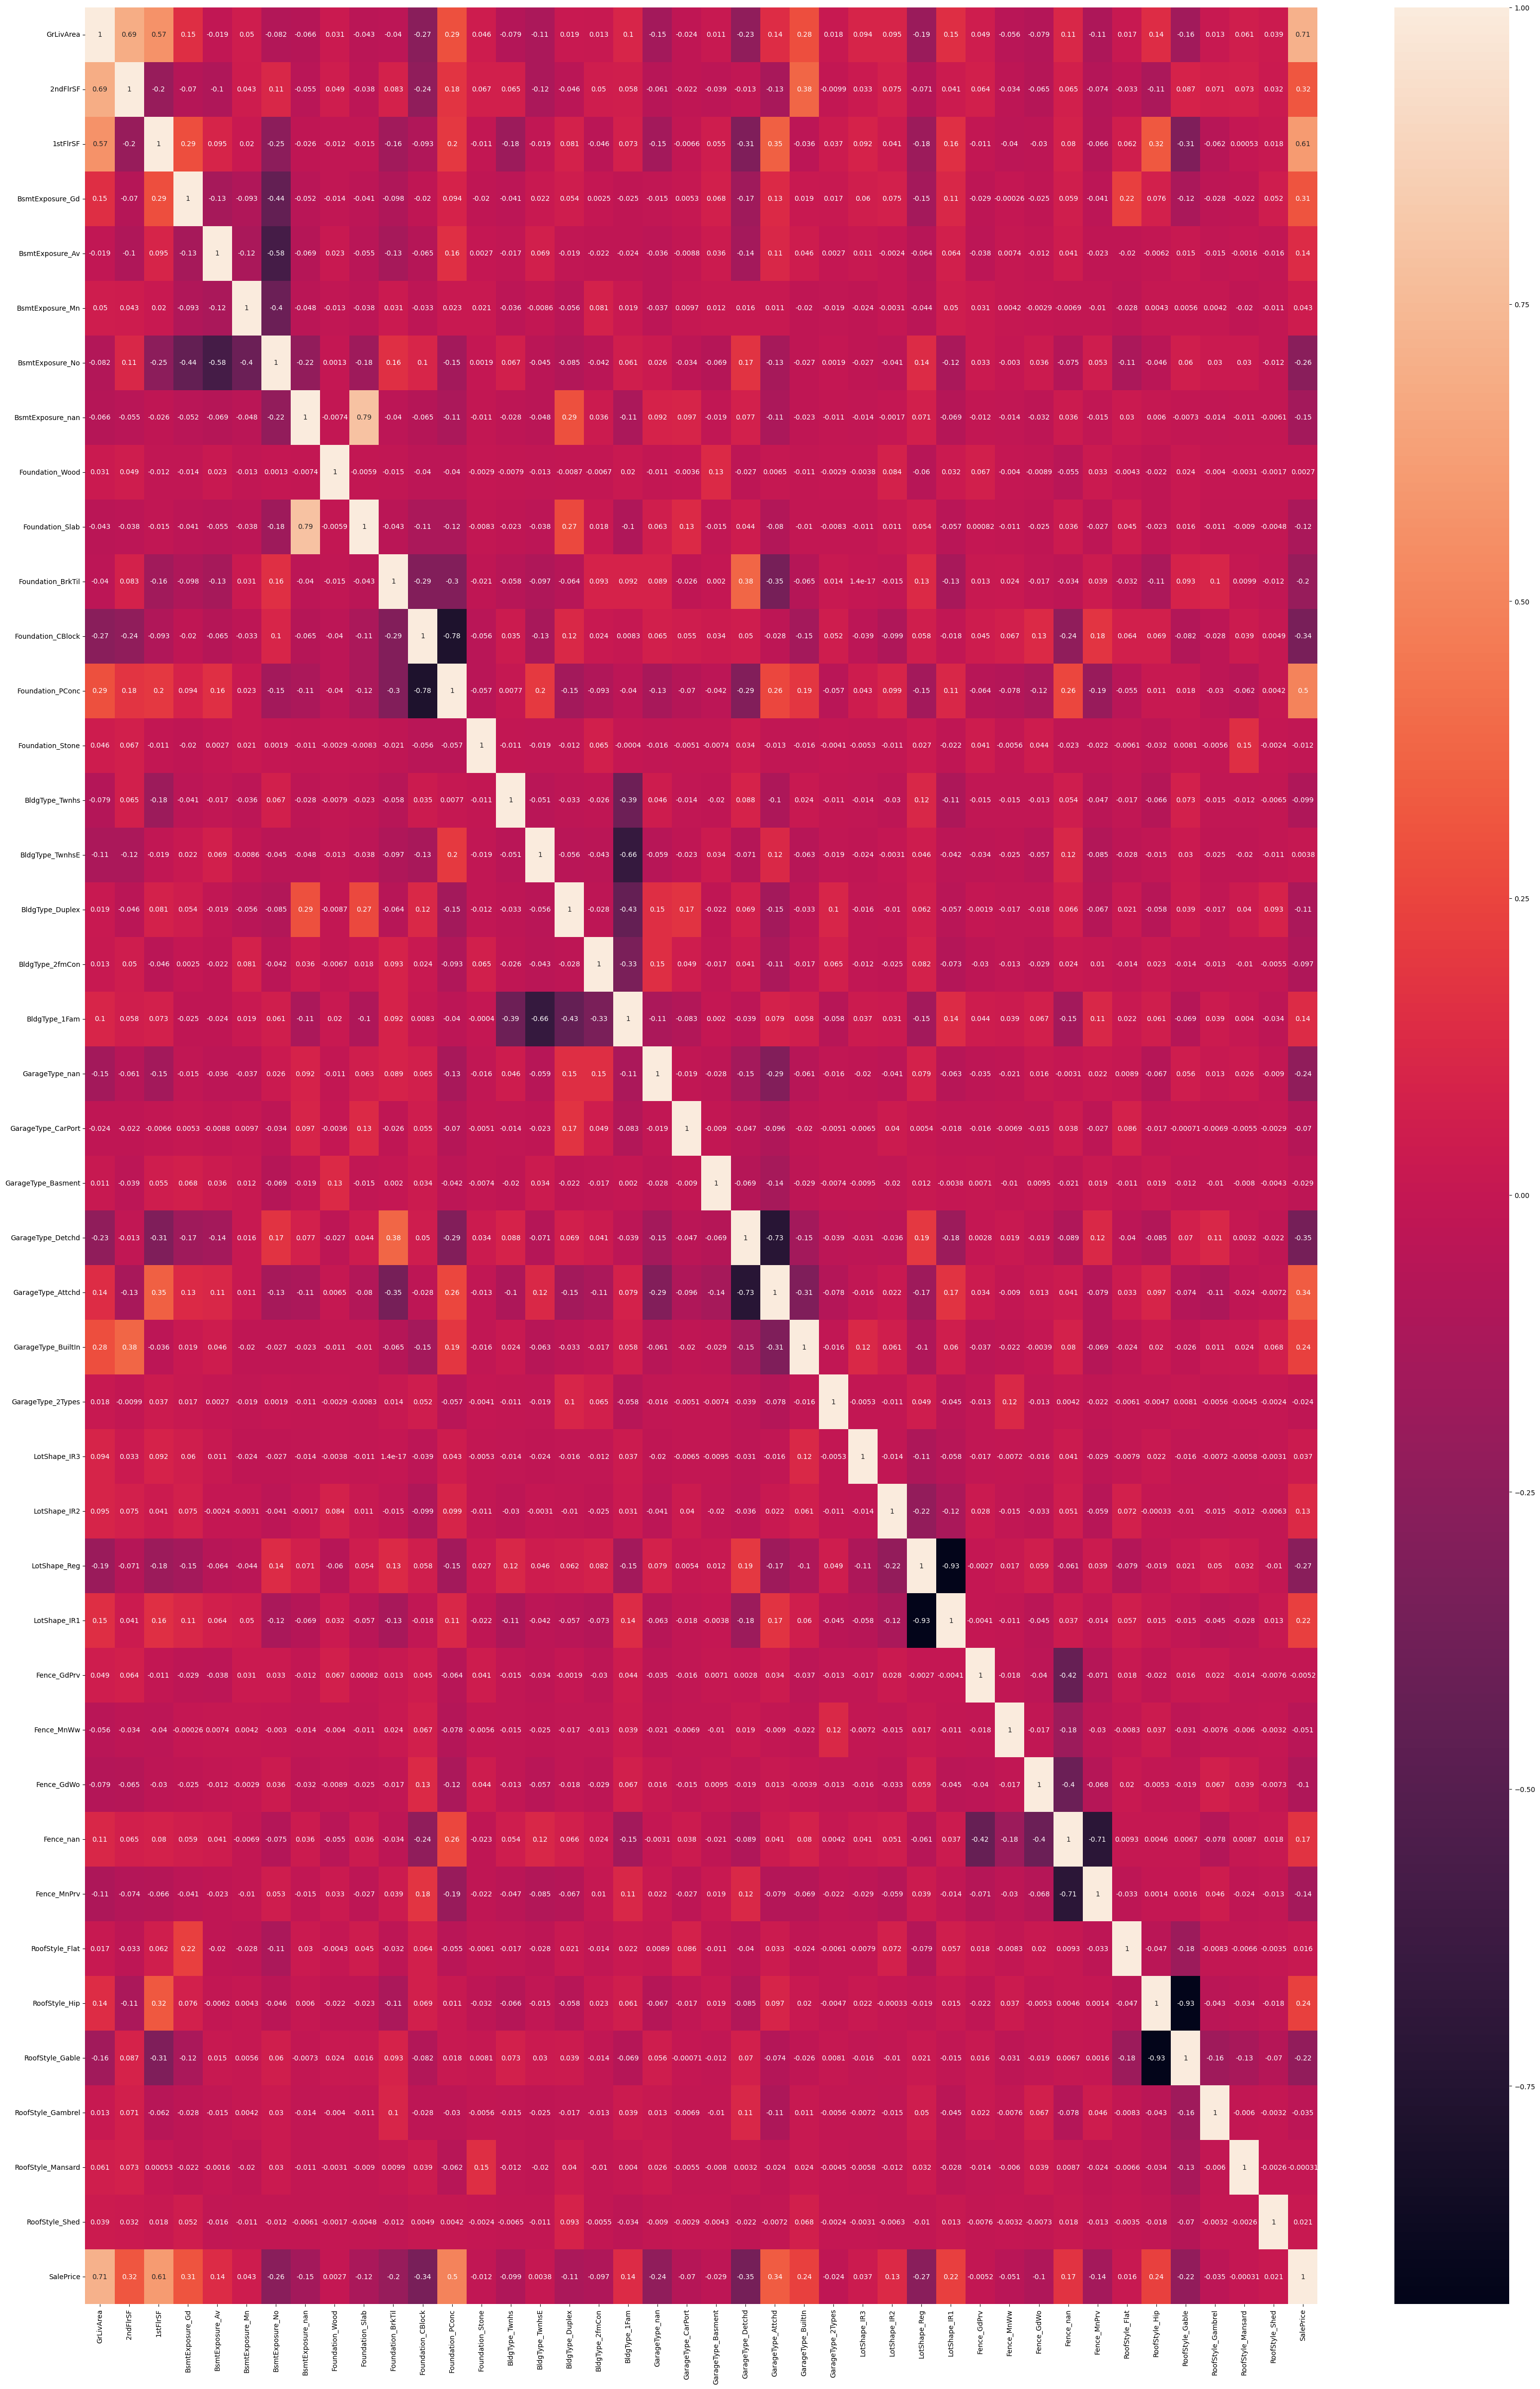

In [27]:
# Here we are ensuring that none of our variables are too correlated or inversly correlated
plt.figure(figsize=(40, 60))
sns.heatmap(final_df.corr(), annot=True)

# We see that with a threshold of |0.8| all variables are fine
# Those that are close to the threshold (or past it) are categorical variables
# of the same category, for which it makes to have strong inversly correlation

In [28]:
# Training a new model with only the new columns
X_train, X_test, y_train, y_test = train_test_split(final_df[final_df.columns[0:len(final_df.columns)-1]], final_df['SalePrice'], test_size=0.3, random_state=10)

reg2 = LinearRegression().fit(X_train, y_train)


In [29]:
# Calculating error of the new model
y_pred = reg2.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

print('Mean absolute error: ', mae)

mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)

Mean absolute error:  27857.556147765772
Mean Squared Error (MSE): 1578785270.3690636
